__Logistic Regression__ is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

# Logistic Regression Assumptions

 1. Binary logistic regression requires the dependent variable to be binary.
    
 2. For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
 
 3. Only the meaningful variables should be included.

 4. The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.

 5. The independent variables are linearly related to the log odds.

 6. Logistic regression requires quite large sample sizes.

Keeping the above assumptions in mind, let’s look at our dataset.

# Data

The dataset comes from the The Spotify Hit Predictor Dataset (1960-2019) of Kaggle, and it is consisting of features for tracks fetched using Spotify's Web API. The dataset starting from Jan 1st, 1980, ending at Dec 31st, 1989. There might be some songs from the 50s, too. The classification goal is to predict whether the track will would be a 'Hit' (1) or not (0) (variable y).

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

The dataset includes 6908 records and 19 fields.

In [2]:
data = pd.read_csv('dataset-of-80s.csv')
print(data.shape)
print(data.columns)

(6908, 19)
Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target'],
      dtype='object')


In [3]:
data.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Walking Blues,Big Joe Williams,spotify:track:1ZjN5X8LmUB67pWPgimW3B,0.509,0.277,6,-14.323,1,0.0495,0.827,0.00206,0.0756,0.640,101.157,161893,4,68.46530,7,0
1,Suddenly Last Summer,The Motels,spotify:track:4fLIM0B1WwrLux9RdnMvze,0.716,0.753,2,-5.682,1,0.0286,0.162,0.03060,0.0831,0.561,120.141,222000,4,57.71583,11,1
2,Sanctuary,Béla Fleck,spotify:track:3DwlNfiCQSdj0GOxYkR9Rq,0.360,0.542,5,-13.885,1,0.0339,0.368,0.16500,0.1160,0.803,116.831,444907,4,30.34574,17,0
3,The Wild Rover,The Pogues,spotify:track:6JyYNPLalPgGa7XnclF5FO,0.656,0.512,7,-11.872,1,0.0290,0.585,0.00000,0.0720,0.880,97.500,157893,3,50.97022,7,0
4,In The Driver's Seat,John Schneider,spotify:track:6jJi8OXF5qaFdysB6sjWIT,0.642,0.889,2,-5.620,0,0.0494,0.375,0.00000,0.1800,0.764,163.351,162293,4,33.62053,7,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6908 entries, 0 to 6907
Data columns (total 19 columns):
track               6908 non-null object
artist              6908 non-null object
uri                 6908 non-null object
danceability        6908 non-null float64
energy              6908 non-null float64
key                 6908 non-null int64
loudness            6908 non-null float64
mode                6908 non-null int64
speechiness         6908 non-null float64
acousticness        6908 non-null float64
instrumentalness    6908 non-null float64
liveness            6908 non-null float64
valence             6908 non-null float64
tempo               6908 non-null float64
duration_ms         6908 non-null int64
time_signature      6908 non-null int64
chorus_hit          6908 non-null float64
sections            6908 non-null int64
target              6908 non-null int64
dtypes: float64(10), int64(6), object(3)
memory usage: 1.0+ MB


### Input variables

 1. track: The Name of the track — (categorial)
 2. artist: The Name of the first artist listed for the track — (categorial)
 3. uri: The resource identifier for the track — (categorial)
 4. danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements —(numeric).
 5. energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks — (numeric).
 6. key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C?/D?, 2 = D, — (numeric).
 7. loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful — (numeric).
 8. mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is — (numeric).
 9. speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book — (numeric).
 10. acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is — (numeric).
 11. instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. — (numeric).
 12. liveness: Detects the presence of an audience in the recording — (numeric). 
 13. valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. — (numeric). 
 14. tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed — (numeric). 
 15. duration_ms: The duration of the track in milliseconds — (numeric). 
 16. time_signature: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats —(numeric).
 17. chorus_hit: This the the author's best estimate of when the chorus would start for the track. Its the timestamp of the start of the third —(numeric).
 18. sections: The number of sections the particular track has. This feature was extracted from the data recieved by the API call — (numeric)
 

### Predict variable (desired target):

target — whether the track is a hit or not? (binary: “1”, means “Yes”, “0” means “No”)

In [5]:
data['track'].unique()
print(len(data['track'].unique()))

6604


In [6]:
print(data['artist'].unique())
print(len(data['artist'].unique()))

['Big Joe Williams' 'The Motels' 'Béla Fleck' ... 'Jimmy Hall' 'Clannad'
 "Boys Don't Cry"]
2021


In [7]:
print(data['uri'].unique())
print(len(data['uri'].unique()))

['spotify:track:1ZjN5X8LmUB67pWPgimW3B'
 'spotify:track:4fLIM0B1WwrLux9RdnMvze'
 'spotify:track:3DwlNfiCQSdj0GOxYkR9Rq' ...
 'spotify:track:2Qv5EUATFNebcFGq3rN8O6'
 'spotify:track:38mEFmht9K7UcpHvS9vtJG'
 'spotify:track:5LeDMHIZ5YDZ2b1VOcYVcG']
6898


# Data exploration

In [8]:
data['target'].value_counts()

1    3454
0    3454
Name: target, dtype: int64

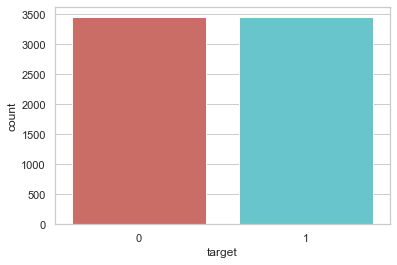

<Figure size 432x288 with 0 Axes>

In [9]:
sns.countplot(x='target', data=data, palette= 'hls')
plt.show()
plt.savefig('count_plot')

In [10]:
count_no_hit = len(data[data['target']==0])
count_hit = len(data[data['target']==1])
pct_of_no_hit = count_no_hit/(count_no_hit+count_hit)
print("\033[1m percentage of no hit is", pct_of_no_hit*100)
pct_of_hit = count_hit/(count_no_hit+count_hit)
print("\033[1m percentage of hit", pct_of_hit*100)

 percentage of no hit is 50.0
 percentage of hit 50.0


Our classes are imbalanced, and the ratio of no-hit to hit instances is 50:50. Let’s do some more exploration.

In [11]:
data.groupby('target').mean()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections
target,,,,,,,,,,,,,,,
0,0.504073,0.563043,5.177186,-12.207036,0.666763,0.069177,0.381555,0.251287,0.219398,0.518783,119.431343,252393.034453,3.880718,40.223036,11.218877
1,0.624444,0.653031,5.289519,-9.876752,0.708454,0.046635,0.204579,0.028439,0.182619,0.657061,121.867801,257119.786335,3.971917,39.287307,11.336422


# Observations:
 1. The average danceability level of hits is higher than that of non-hits.
 2. The average energy level of hits is higher than that of non-hits.
 3. The average key level of hits is a bit lower than that of non-hits.
 4. The average loudness level of hits is lower than that of non-hits.
 5. The average mode level of hits is higher than that of non-hits.
 6. The average speechiness level of hits is a bit lower than that of non-hits.
 7. The average acousticness level of hits is a bit lower than that of non-hits.
 8. The average instrumentalness level of hits is lower than that of non-hits.
 9. The average liveness level of hits is a bit lower than that of non-hits.
 10. The average valence level of hits is higher than that of non-hits.
 11. The average tempo level of hits is higher than that of non-hits.
 12. The average duration_ms level of hits is lower than that of non-hits.
 13. The average time_signature level of hits is higher than that of non-hits.
 14. The average chorus_hit level of hits is a bit lower than that of non-hits.
 15. The average sections level of hits is a bit lower than that of non-hits.


# Visualizations

## 1. danceability

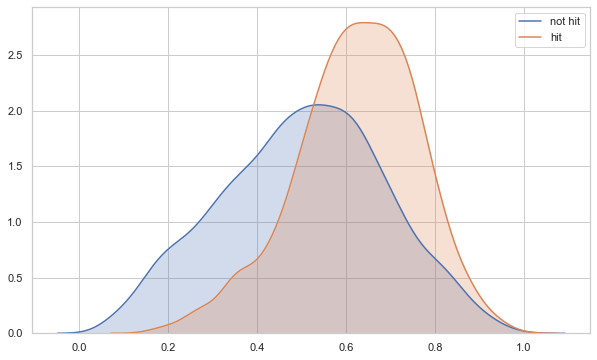

In [12]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import matplotlib.pyplot as plt
import seaborn as sns
sns.kdeplot(data['danceability'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['danceability'].loc[data['target'] == 1], label='hit', shade=True);

In [13]:
data['danceability'].loc[data['target'] == 0].describe()

count    3454.000000
mean        0.504073
std         0.183241
min         0.065600
25%         0.374000
50%         0.512000
75%         0.633000
max         0.978000
Name: danceability, dtype: float64

In [14]:
data['danceability'].loc[data['target'] == 1].describe()

count    3454.000000
mean        0.624444
std         0.138208
min         0.156000
25%         0.539000
50%         0.632500
75%         0.724000
max         0.988000
Name: danceability, dtype: float64

## 2. energy

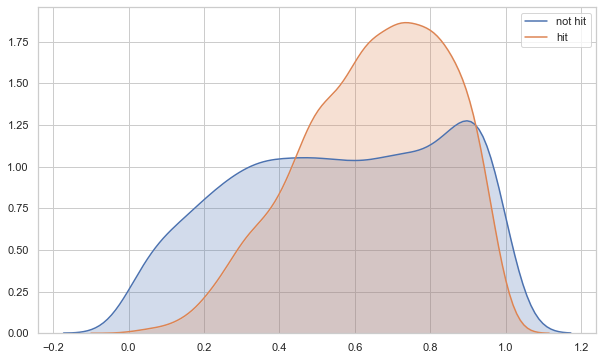

In [15]:
sns.kdeplot(data['energy'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['energy'].loc[data['target'] == 1], label='hit', shade=True);

In [16]:
data['energy'].loc[data['target'] == 0].describe()

count    3454.000000
mean        0.563043
std         0.277099
min         0.000276
25%         0.339000
50%         0.573000
75%         0.813750
max         1.000000
Name: energy, dtype: float64

In [17]:
data['energy'].loc[data['target'] == 1].describe()

count    3454.000000
mean        0.653031
std         0.192987
min         0.020400
25%         0.517000
50%         0.673000
75%         0.808000
max         0.995000
Name: energy, dtype: float64

## 3. key

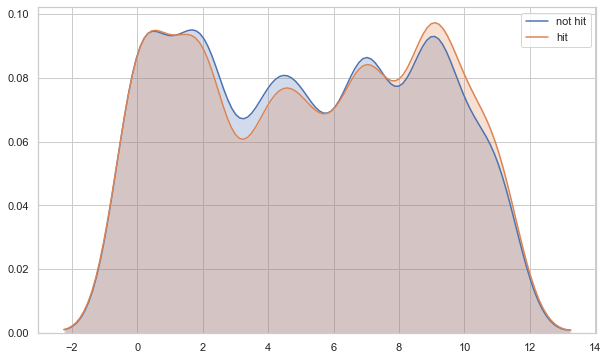

In [18]:
sns.kdeplot(data['key'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['key'].loc[data['target'] == 1], label='hit', shade=True);

In [19]:
data['key'].loc[data['target'] == 0].describe()

count    3454.000000
mean        5.177186
std         3.570463
min         0.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        11.000000
Name: key, dtype: float64

In [20]:
data['key'].loc[data['target'] == 1].describe()

count    3454.000000
mean        5.289519
std         3.623478
min         0.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        11.000000
Name: key, dtype: float64

## 4. loudness

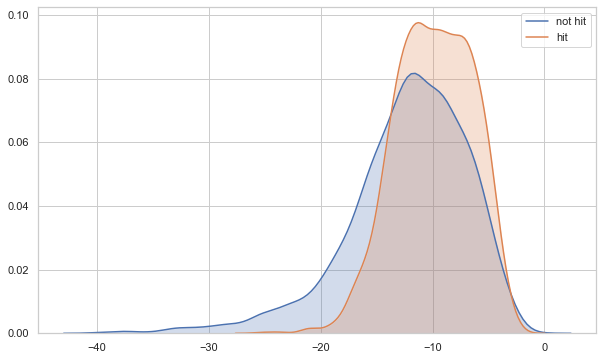

In [21]:
sns.kdeplot(data['loudness'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['loudness'].loc[data['target'] == 1], label='hit', shade=True);

In [22]:
data['loudness'].loc[data['target'] == 0].describe()

count    3454.000000
mean      -12.207036
std         5.407475
min       -39.940000
25%       -15.011500
50%       -11.607000
75%        -8.395500
max        -0.683000
Name: loudness, dtype: float64

In [23]:
data['loudness'].loc[data['target'] == 1].describe()

count    3454.000000
mean       -9.876752
std         3.446200
min       -25.487000
25%       -12.373250
50%        -9.778500
75%        -7.135250
max        -2.100000
Name: loudness, dtype: float64

## 5. mode

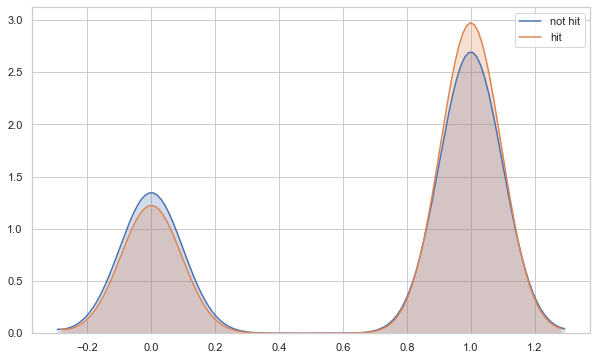

In [24]:
sns.kdeplot(data['mode'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['mode'].loc[data['target'] == 1], label='hit', shade=True);

In [25]:
data['mode'].loc[data['target'] == 0].describe()

count    3454.000000
mean        0.666763
std         0.471439
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: mode, dtype: float64

In [26]:
data['mode'].loc[data['target'] == 1].describe()

count    3454.000000
mean        0.708454
std         0.454540
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: mode, dtype: float64

## 6. speechiness

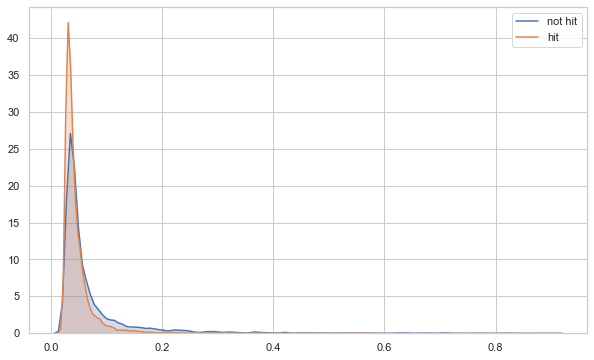

In [27]:
sns.kdeplot(data['speechiness'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['speechiness'].loc[data['target'] == 1], label='hit', shade=True);

In [28]:
data['speechiness'].loc[data['target'] == 0].describe()

count    3454.000000
mean        0.069177
std         0.073389
min         0.022300
25%         0.034925
50%         0.044500
75%         0.068975
max         0.903000
Name: speechiness, dtype: float64

In [29]:
data['speechiness'].loc[data['target'] == 1].describe()

count    3454.000000
mean        0.046635
std         0.032172
min         0.022400
25%         0.031025
50%         0.037200
75%         0.050000
max         0.565000
Name: speechiness, dtype: float64

## 7. acousticness

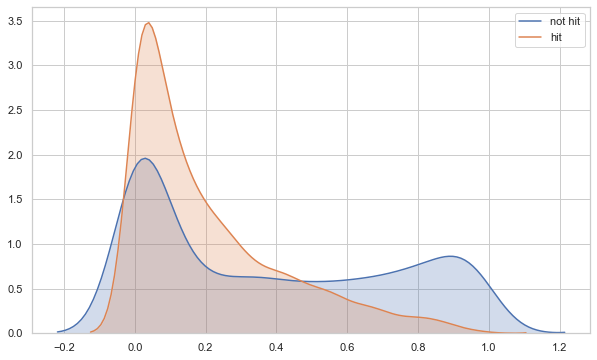

In [30]:
sns.kdeplot(data['acousticness'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['acousticness'].loc[data['target'] == 1], label='hit', shade=True);

In [31]:
data['acousticness'].loc[data['target'] == 0].describe()

count    3454.000000
mean        0.381555
std         0.350192
min         0.000001
25%         0.027200
50%         0.304500
75%         0.720750
max         0.996000
Name: acousticness, dtype: float64

In [32]:
data['acousticness'].loc[data['target'] == 1].describe()

count    3454.000000
mean        0.204579
std         0.212803
min         0.000024
25%         0.037600
50%         0.127000
75%         0.307750
max         0.980000
Name: acousticness, dtype: float64

## 8. instrumentalness

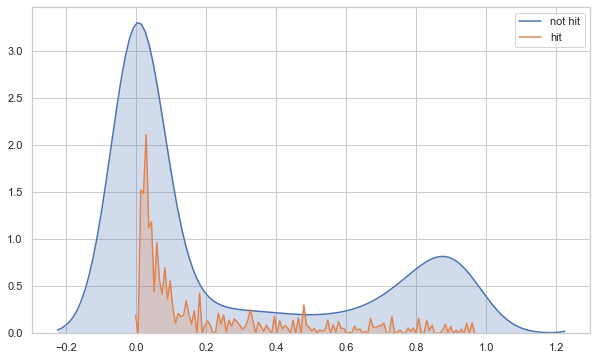

In [33]:
sns.kdeplot(data['instrumentalness'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['instrumentalness'].loc[data['target'] == 1], label='hit', shade=True);

In [34]:
data['instrumentalness'].loc[data['target'] == 0].describe()

count    3454.000000
mean        0.251287
std         0.359384
min         0.000000
25%         0.000010
50%         0.005830
75%         0.583250
max         1.000000
Name: instrumentalness, dtype: float64

In [35]:
data['instrumentalness'].loc[data['target'] == 1].describe()

count    3454.000000
mean        0.028439
std         0.109922
min         0.000000
25%         0.000002
50%         0.000061
75%         0.002365
max         0.966000
Name: instrumentalness, dtype: float64

## 9. liveness

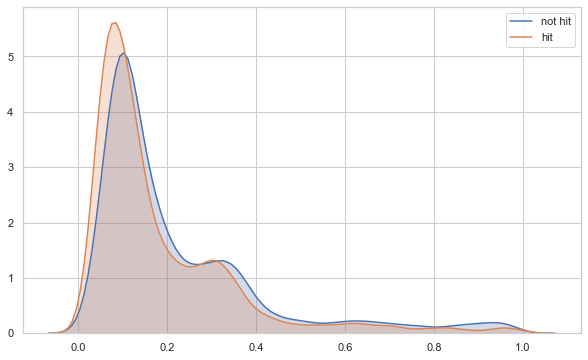

In [36]:
sns.kdeplot(data['liveness'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['liveness'].loc[data['target'] == 1], label='hit', shade=True);

In [37]:
data['liveness'].loc[data['target'] == 0].describe()

count    3454.000000
mean        0.219398
std         0.192788
min         0.020500
25%         0.095925
50%         0.143000
75%         0.286750
max         0.982000
Name: liveness, dtype: float64

In [38]:
data['liveness'].loc[data['target'] == 1].describe()

count    3454.000000
mean        0.182619
std         0.167838
min         0.018600
25%         0.075025
50%         0.119000
75%         0.241000
max         0.997000
Name: liveness, dtype: float64

## 10. valence

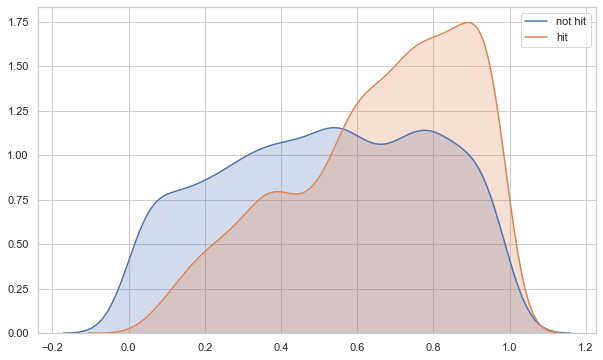

In [39]:
sns.kdeplot(data['valence'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['valence'].loc[data['target'] == 1], label='hit', shade=True);

In [40]:
data['valence'].loc[data['target'] == 0].describe()

count    3454.000000
mean        0.518783
std         0.274009
min         0.000010
25%         0.297000
50%         0.530000
75%         0.755000
max         0.990000
Name: valence, dtype: float64

In [41]:
data['valence'].loc[data['target'] == 1].describe()

count    3454.000000
mean        0.657061
std         0.233132
min         0.040000
25%         0.501000
50%         0.702000
75%         0.852000
max         0.984000
Name: valence, dtype: float64

## 11. tempo

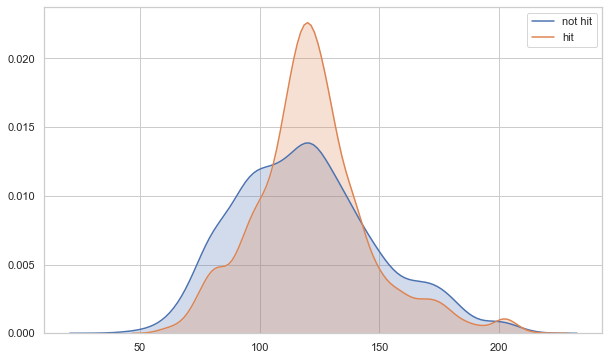

In [42]:
sns.kdeplot(data['tempo'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['tempo'].loc[data['target'] == 1], label='hit', shade=True);

In [43]:
data['tempo'].loc[data['target'] == 0].describe()

count    3454.000000
mean      119.431343
std        29.489973
min        39.002000
25%        97.444250
50%       117.826500
75%       137.018500
max       214.121000
Name: tempo, dtype: float64

In [44]:
data['tempo'].loc[data['target'] == 1].describe()

count    3454.000000
mean      121.867801
std        24.439444
min        58.498000
25%       107.969500
50%       120.151500
75%       133.213500
max       217.396000
Name: tempo, dtype: float64

## 12. duration_ms

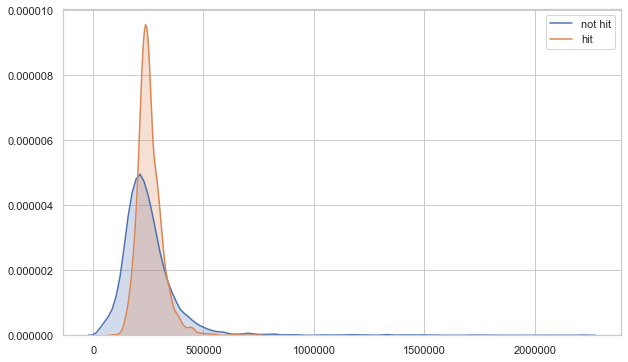

In [45]:
sns.kdeplot(data['duration_ms'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['duration_ms'].loc[data['target'] == 1], label='hit', shade=True);

In [46]:
data['duration_ms'].loc[data['target'] == 0].describe()

count    3.454000e+03
mean     2.523930e+05
std      1.408783e+05
min      2.951400e+04
25%      1.789002e+05
50%      2.283540e+05
75%      2.908432e+05
max      2.223827e+06
Name: duration_ms, dtype: float64

In [47]:
data['duration_ms'].loc[data['target'] == 1].describe()

count      3454.000000
mean     257119.786335
std       56402.323727
min       95507.000000
25%      221939.750000
50%      248133.000000
75%      284380.250000
max      738053.000000
Name: duration_ms, dtype: float64

## 13. time_signature

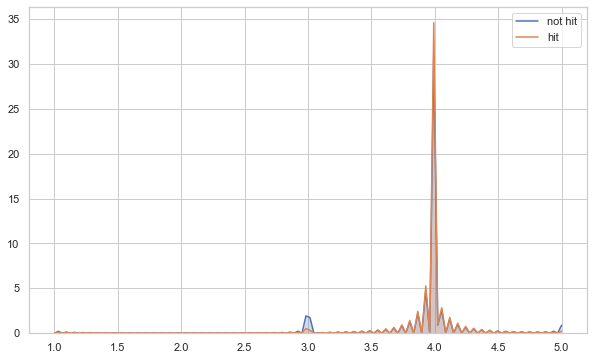

In [48]:
sns.kdeplot(data['time_signature'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['time_signature'].loc[data['target'] == 1], label='hit', shade=True);

In [49]:
data['time_signature'].loc[data['target'] == 0].describe()

count    3454.000000
mean        3.880718
std         0.451164
min         1.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: time_signature, dtype: float64

In [50]:
data['time_signature'].loc[data['target'] == 1].describe()

count    3454.000000
mean        3.971917
std         0.215445
min         1.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: time_signature, dtype: float64

## 14. chorus_hit

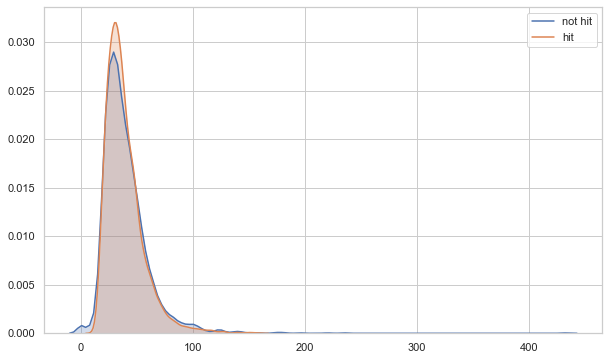

In [51]:
sns.kdeplot(data['chorus_hit'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['chorus_hit'].loc[data['target'] == 1], label='hit', shade=True);

In [52]:
data['chorus_hit'].loc[data['target'] == 0].describe()

count    3454.000000
mean       40.223036
std        21.108112
min         0.000000
25%        26.995533
50%        35.602540
75%        48.133415
max       433.182000
Name: chorus_hit, dtype: float64

In [53]:
data['chorus_hit'].loc[data['target'] == 1].describe()

count    3454.000000
mean       39.287307
std        16.926793
min        13.307160
25%        27.859498
50%        35.552200
75%        46.576947
max       158.858220
Name: chorus_hit, dtype: float64

## 15. sections

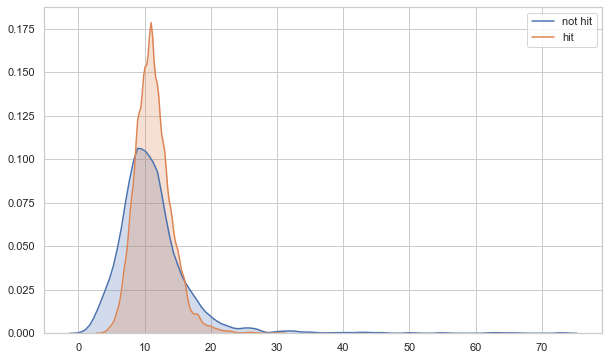

In [54]:
sns.kdeplot(data['sections'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['sections'].loc[data['target'] == 1], label='hit', shade=True);

In [55]:
data['sections'].loc[data['target'] == 0].describe()

count    3454.000000
mean       11.218877
std         5.697880
min         1.000000
25%         8.000000
50%        10.000000
75%        13.000000
max        73.000000
Name: sections, dtype: float64

In [56]:
data['sections'].loc[data['target'] == 1].describe()

count    3454.000000
mean       11.336422
std         2.744506
min         4.000000
25%        10.000000
50%        11.000000
75%        13.000000
max        30.000000
Name: sections, dtype: float64

Our final data columns will be:

In [57]:
data_final=data.copy()
data_final.columns.values

array(['track', 'artist', 'uri', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'chorus_hit', 'sections', 'target'], dtype=object)

In [58]:
data_final.drop(['track', 'artist', 'uri'], axis=1, inplace=True)

In [59]:
data_final.columns.values

array(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'chorus_hit', 'sections',
       'target'], dtype=object)

In [60]:
X = data_final.loc[:, data_final.columns != 'target']
y = data_final.loc[:, data_final.columns == 'target']
y=y.astype('int')

# Implementing the model

In [61]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.485855
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.299    
Dependent Variable:   target            AIC:               6742.5668
Date:                 2020-06-03 00:12  BIC:               6845.1733
No. Observations:     6908              Log-Likelihood:    -3356.3  
Df Model:             14                LL-Null:           -4788.3  
Df Residuals:         6893              LLR p-value:       0.0000   
Converged:            1.0000            Scale:             1.0000   
No. Iterations:       7.0000                                        
--------------------------------------------------------------------
                  Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
--------------------------------------------------------------------
danceability       4.6369   0.2529  18.3343 0.0000   4.1412   5.1326
energy            -1.0659   

# Logistic Regression Model Fitting

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Predicting the test set results and calculating the accuracy

In [63]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.50


### Confusion Matrix

In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[   0 1042]
 [   0 1031]]


In [65]:
print("\033[1m The result is telling us that we have: ",
      (confusion_matrix[0,0]+confusion_matrix[1,1]),
      "correct predictions.")
print("\033[1m The result is telling us that we have: ",
      (confusion_matrix[0,1]+confusion_matrix[1,0]),
      "incorrect predictions.")
print("\033[1m We have a total predictions of: ",
      (confusion_matrix.sum()))

 The result is telling us that we have:  1031 correct predictions.
 The result is telling us that we have:  1042 incorrect predictions.
 We have a total predictions of:  2073


### Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1042
           1       0.50      1.00      0.66      1031

    accuracy                           0.50      2073
   macro avg       0.25      0.50      0.33      2073
weighted avg       0.25      0.50      0.33      2073



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
 #calculate Accuracy, how often is the classifier correct?
print("Accuracy of Logistic Regression model:", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
print("Well, you got a classification rate of", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
#calculate Precision
print("\nPrecision of Logistic Regression model:", "{:.2%}".format(metrics.precision_score(y_test, y_pred)))
print("Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can\nsay, when a model makes a prediction, how often it is correct. In our prediction case, when our Logistic\nRegression model predicted a track is a hit, that track was actually a hit","{:.2%}".format(metrics.precision_score(y_test, y_pred)),"of\n the time.")
#calculate Recall
print("\nRecall of Logistic Regression model:", "{:.2%}".format(metrics.recall_score(y_test, y_pred)))
print("Recall: If there is a track which is a hit the present in the test set, our Logistic Regression model\ncan identify it", "{:.2%}".format(metrics.recall_score(y_test, y_pred)) ,"of the time.")

Accuracy of Logistic Regression model: 49.73%
Well, you got a classification rate of 49.73%

Precision of Logistic Regression model: 49.73%
Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can
say, when a model makes a prediction, how often it is correct. In our prediction case, when our Logistic
Regression model predicted a track is a hit, that track was actually a hit 49.73% of
 the time.

Recall of Logistic Regression model: 100.00%
Recall: If there is a track which is a hit the present in the test set, our Logistic Regression model
can identify it 100.00% of the time.


### ROC Curve

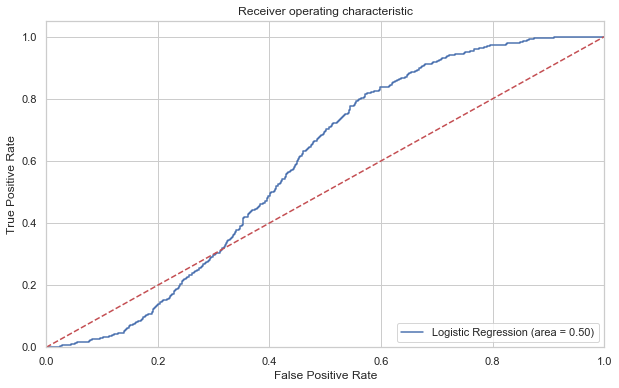

In [68]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

# Random forest Classifier Model Fitting

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Predicting the test set results and calculating the accuracy

In [70]:
y_pred = rf.predict(X_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.79


### Confusion Matrix

In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[795 247]
 [189 842]]


In [72]:
print("\033[1m The result is telling us that we have: ",
      (confusion_matrix[0,0]+confusion_matrix[1,1]),
      "correct predictions.")
print("\033[1m The result is telling us that we have: ",
      (confusion_matrix[0,1]+confusion_matrix[1,0]),
      "incorrect predictions.")
print("\033[1m We have a total predictions of: ",
      (confusion_matrix.sum()))

 The result is telling us that we have:  1637 correct predictions.
 The result is telling us that we have:  436 incorrect predictions.
 We have a total predictions of:  2073


### Compute precision, recall, F-measure and support

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78      1042
           1       0.77      0.82      0.79      1031

    accuracy                           0.79      2073
   macro avg       0.79      0.79      0.79      2073
weighted avg       0.79      0.79      0.79      2073



In [74]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
 #calculate Accuracy, how often is the classifier correct?
print("Accuracy of Random Forest model:", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
print("Well, you got a classification rate of", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
#calculate Precision
print("\nPrecision of Random Forest model:", "{:.2%}".format(metrics.precision_score(y_test, y_pred)))
print("Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can\nsay, when a model makes a prediction, how often it is correct. In our prediction case, when our Random\nForest model predicted a track is a hit, that track was actually a hit","{:.2%}".format(metrics.precision_score(y_test, y_pred)),"of\n the time.")
#calculate Recall
print("\nRecall of Random Forest model:", "{:.2%}".format(metrics.recall_score(y_test, y_pred)))
print("Recall: If there is a track which is a hit the present in the test set, our Random Forest model\ncan identify it", "{:.2%}".format(metrics.recall_score(y_test, y_pred)) ,"of the time.")

Accuracy of Random Forest model: 78.97%
Well, you got a classification rate of 78.97%

Precision of Random Forest model: 77.32%
Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can
say, when a model makes a prediction, how often it is correct. In our prediction case, when our Random
Forest model predicted a track is a hit, that track was actually a hit 77.32% of
 the time.

Recall of Random Forest model: 81.67%
Recall: If there is a track which is a hit the present in the test set, our Random Forest model
can identify it 81.67% of the time.


### ROC Curve

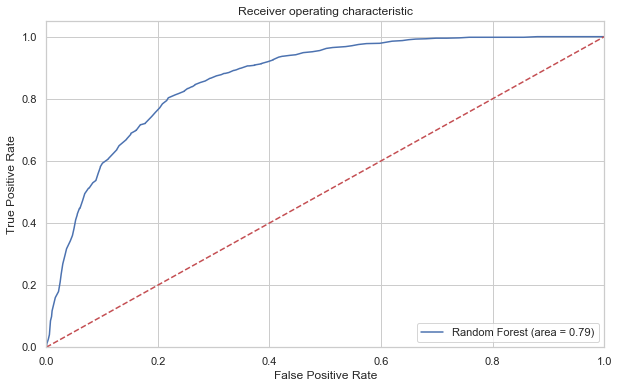

In [75]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Gradient boosting Classifier Model Fitting

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### Predicting the test set results and calculating the accuracy

In [77]:
y_pred = gb.predict(X_test)
print('Accuracy of gradient boosting classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))

Accuracy of gradient boosting classifier on test set: 0.79


### Confusion Matrix

In [78]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[761 281]
 [168 863]]


In [79]:
print("\033[1m The result is telling us that we have: ",
      (confusion_matrix[0,0]+confusion_matrix[1,1]),
      "correct predictions.")
print("\033[1m The result is telling us that we have: ",
      (confusion_matrix[0,1]+confusion_matrix[1,0]),
      "incorrect predictions.")
print("\033[1m We have a total predictions of: ",
      (confusion_matrix.sum()))

 The result is telling us that we have:  1624 correct predictions.
 The result is telling us that we have:  449 incorrect predictions.
 We have a total predictions of:  2073


### Compute precision, recall, F-measure and support

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77      1042
           1       0.75      0.84      0.79      1031

    accuracy                           0.78      2073
   macro avg       0.79      0.78      0.78      2073
weighted avg       0.79      0.78      0.78      2073



In [81]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
 #calculate Accuracy, how often is the classifier correct?
print("Accuracy of Gradient Boosting model:", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
print("Well, you got a classification rate of", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
#calculate Precision
print("\nPrecision of Gradient Boosting model:", "{:.2%}".format(metrics.precision_score(y_test, y_pred)))
print("Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can\nsay, when a model makes a prediction, how often it is correct. In our prediction case, when our Gradient\nBoosting model predicted a track is a hit, that track was actually a hit","{:.2%}".format(metrics.precision_score(y_test, y_pred)),"of\n the time.")
#calculate Recall
print("\nRecall of Gradient Boosting model:", "{:.2%}".format(metrics.recall_score(y_test, y_pred)))
print("Recall: If there is a track which is a hit the present in the test set, our Gradient Boosting model\ncan identify it", "{:.2%}".format(metrics.recall_score(y_test, y_pred)) ,"of the time.")

Accuracy of Gradient Boosting model: 78.34%
Well, you got a classification rate of 78.34%

Precision of Gradient Boosting model: 75.44%
Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can
say, when a model makes a prediction, how often it is correct. In our prediction case, when our Gradient
Boosting model predicted a track is a hit, that track was actually a hit 75.44% of
 the time.

Recall of Gradient Boosting model: 83.71%
Recall: If there is a track which is a hit the present in the test set, our Gradient Boosting model
can identify it 83.71% of the time.


### ROC Curve

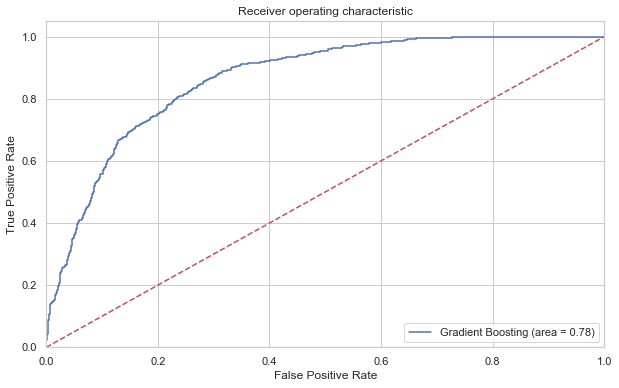

In [82]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
gb_roc_auc = roc_auc_score(y_test, gb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting (area = %0.2f)' % gb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

I would consider the random forest as our final model

# Real time predictions

Finally, the best way to use this model is assigning hit Probability for each track, create segments, and build strategies on top of that. To get the churn probability from our model, utilize the code block below:

In [86]:
data['Prob_to_Hit'] = rf.predict_proba(data[X_train.columns])[:,1]

Our dataset looks like below at the end:

In [87]:
data[['track','artist','Prob_to_Hit']].head(10)

,track,artist,Prob_to_Hit
0,Walking Blues,Big Joe Williams,0.10
1,Suddenly Last Summer,The Motels,0.92
2,Sanctuary,Béla Fleck,0.06
3,The Wild Rover,The Pogues,0.07
4,In The Driver's Seat,John Schneider,0.48
5,Slow Kill,Fields Of The Nephilim,0.10
6,Young Wild And Free,Brighton Rock,0.52
7,Holiday,The Other Ones,0.82
8,Answering Machine,Rupert Holmes,0.69
9,Crystal Ball,Yngwie Malmsteen,0.70


In [88]:
data.to_csv('Prob_to_Hit_80s.csv', index=False, encoding='utf-8')

# Your Turn!

Hopefully, this post gives you a good idea of what a machine learning classification project looks like. As you can see, much of the work is in the data wrangling and the preparation steps, and these procedures consume most of the time spent on machine learning.

Now it’s time to get out there and start exploring and cleaning your data. Try two or three algorithms, and let me know how it goes.

I would be pleased to receive feedback or questions on any of the above.